In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import downloader

In [3]:
# Get the data
url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"
file_name = "moore.csv"

downloader.download_from_url(url, file_name)
download_path = downloader.download_path

moore.csv download complete


In [4]:
# Load in the data
data = pd.read_csv(f'{download_path}/moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1, 1)
# -1 means size unknown

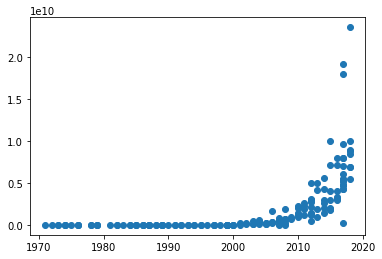

In [5]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

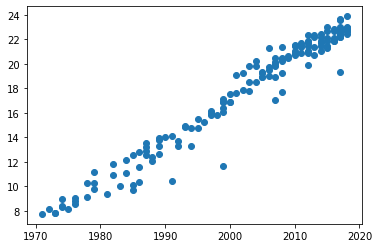

In [6]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y);
# that's better

In [7]:
# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
X = (X - mx)/sx
print(mx, sx)

my = Y.mean()
sy = Y.std()
Y = (Y - my)/sy
print(my, sy)

2002.1975308641975 13.647610701290743
17.76493939363179 4.7555444592907605


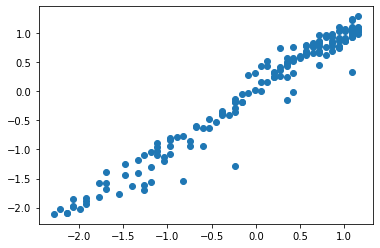

In [10]:
# Everything is centered and in a small range
plt.scatter(X, Y);

In [11]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [12]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [13]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [14]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [15]:
type(inputs)

torch.Tensor

In [16]:
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 4.0909
Epoch 2/100, Loss: 3.9304
Epoch 3/100, Loss: 3.6681
Epoch 4/100, Loss: 3.3498
Epoch 5/100, Loss: 3.0089
Epoch 6/100, Loss: 2.6683
Epoch 7/100, Loss: 2.3427
Epoch 8/100, Loss: 2.0408
Epoch 9/100, Loss: 1.7668
Epoch 10/100, Loss: 1.5222
Epoch 11/100, Loss: 1.3067
Epoch 12/100, Loss: 1.1186
Epoch 13/100, Loss: 0.9556
Epoch 14/100, Loss: 0.8153
Epoch 15/100, Loss: 0.6952
Epoch 16/100, Loss: 0.5927
Epoch 17/100, Loss: 0.5055
Epoch 18/100, Loss: 0.4316
Epoch 19/100, Loss: 0.3691
Epoch 20/100, Loss: 0.3163
Epoch 21/100, Loss: 0.2718
Epoch 22/100, Loss: 0.2343
Epoch 23/100, Loss: 0.2027
Epoch 24/100, Loss: 0.1762
Epoch 25/100, Loss: 0.1539
Epoch 26/100, Loss: 0.1352
Epoch 27/100, Loss: 0.1196
Epoch 28/100, Loss: 0.1064
Epoch 29/100, Loss: 0.0954
Epoch 30/100, Loss: 0.0861
Epoch 31/100, Loss: 0.0784
Epoch 32/100, Loss: 0.0719
Epoch 33/100, Loss: 0.0664
Epoch 34/100, Loss: 0.0619
Epoch 35/100, Loss: 0.0581
Epoch 36/100, Loss: 0.0549
Epoch 37/100, Loss: 0.0522
Epoch 38/1

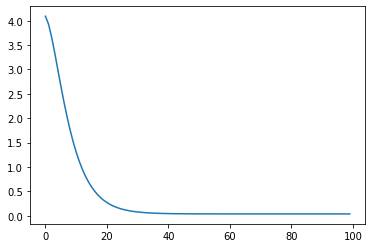

In [17]:
# Loss per iteration
plt.plot(losses);

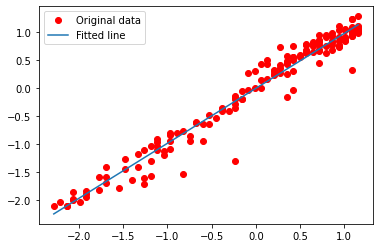

In [18]:
# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [19]:
# What does this mean?
w = model.weight.data.item()
print(w)

0.9801862835884094


# Transforming back to original scale

Our original hypothesis is that the growth is exponential. This has the form:

$$ C = C_0 r ^ t $$

In this equation, $C$ is the transistor count, $t$ is the year, $C_0$ is the original transistor count at year $0$, and $r$ is the rate of growth.

We made this equation linear by taking the log of both sides.

$$ \log C = \log C_0 + \log r * t $$

Here, $\log C$ represents the variable that goes along the y-axis, and $t$ represents the variable that goes along the x-axis.

In other words, under our hypothesized model, the log of transistor counts is linear with respect to time.

Let us rename the variables to a more familiar form:

$$ y = a x + \log C_0 $$

Now $y=\log C$ represents the log of transistor counts and $x=t$ represents time. $a = \log r$ is the slope and $\log C_0$ is the y-intercept.

# Our Model

We normalized the data as follows:

$$ y' = \frac{y - m_y}{s_y} $$

$$ x' = \frac{x - m_x}{s_x} $$

Here, $m_x$ represents the sample mean of the $x$ data and $s_x$ represens the sample standard deviation of the $x$ data, with analogous definitions for $m_y$ and $s_y$.

Our model looks like:

$$ y' = wx' + b $$

We can recover the original model by substituting $x'$ and $y'$ with corresponding expressions in terms of $x$ and $y$.

$$ \frac{y - m_y}{s_y} = w \frac{x - m_x}{s_x} + b $$

After some algebraic manipulation (try it yourself, it's only high school math), we get:

$$ y = w \frac{s_y}{s_x} x - w \frac{s_y}{s_x} m_x + b s_y + m_y = a x + \log C_0 $$

It is clear that the coefficient in front of $x$ represents our original $a$, and the sum of all the other terms represents $\log C_0$.

We are only interested in the doubling time, so we have found that:

$$ a = w \frac{s_y}{s_x} $$

In [20]:
a = w * sy / sx
print(a)

0.34154838909281104


# Exponential Growth Model

Our equation is currently linear. We still need to find the doubling time.

Our original model for exponential growth is:

$$ C = C_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log C_0 $$

This is our linear equation:

$$ y = ax + \log C_0 $$

Where:

$$ y = \log C $$
$$ a = \log r $$
$$ x = t $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.341659983 $$

so that:

$$ r = e^{0.341659983} = 1.40728 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = C_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = C_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (C_0 r ^ {t'}) / C_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [21]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0294259984683816
